## Clustering example

In [1]:
%matplotlib inline
import os
import shutil
from typing import Tuple

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.datasets import make_blobs

sns.set(font_scale=1.2)
sns.set_style("whitegrid", {'grid.linestyle':'--'})

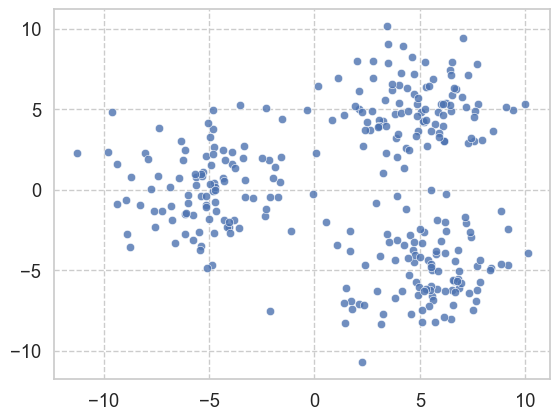

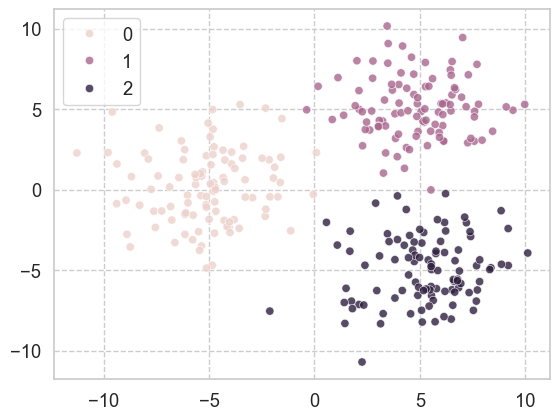

In [2]:
# make blobs
X, y = make_blobs(
    n_samples=300, 
    random_state=8, 
    centers=[[-5, 0], [5, 5], [5, -5]],
    cluster_std=2.0,    
)

# no label
plt.figure()
sns.scatterplot(x=X[:, 0], y=X[:, 1], alpha=0.8)

# with label
plt.figure()
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, alpha=0.8)

plt.show()

## K-means example

K-means clustering is a popular unsupervised machine learning algorithm used for partitioning a set of data points into a specified number of clusters or groups. The goal of K-means is to group similar data points together and discover patterns or structures within the data. 

Below we will demonstrate how to use Lloyd's algorithm to perform K-means clustering.

In [3]:
# Lloyd's algorithm
def find_cluster(X: np.array, centers: np.array) -> np.array:
    """
    Find the cluster assignment of each point from X, to the given centers.
    
    Args:
        X: The input data, that has the shape of (n, d).
        centers: The cluster centers, that have the shape of (k, d), where k is the number of clusters.
            The cluster assignment is the same as the list index.
        
    Returns:
        (np.array): The cluster assignment for each point. The shape is (n, 1).
    """
    all_distances = []  # it will have the shape of (n, k)
    for c in centers:
        distance = np.sum(np.square(X - c), axis=1)
        all_distances.append(distance)
    
    # reshape the distances to a 2D array
    all_distances = np.array(all_distances).T
    
    # find the cluster assignment
    assignments = np.argmin(all_distances, axis=1)
    return assignments

def find_centers(X: np.array, assignments: np.array) -> np.array:
    """Find the new center for each cluster."""
    cluster_index = sorted(np.unique(assignments))
    centers = []
    for k in cluster_index:
        center = np.mean(X[assignments == k], axis=0)
        centers.append(list(center))
    
    centers = np.array(centers)
    assert centers.shape == (len(cluster_index), X.shape[1]), \
        f"Expecting a shape of ({len(cluster_index)}, {X.shape[1]}), got {centers.shape}."
    return centers

def plot_assignment_and_centers(X: np.array, centers: np.array, assignments: np.array):
    """Plot the cluster assignments, and the corresponding cluster centroids."""
    plt.figure()
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=assignments, alpha=0.8)
    sns.scatterplot(x=centers[:, 0], y=centers[:, 1], marker="x", color="g", s=200, linewidth=3)
    plt.gca().get_legend().remove()
    
    
def kmeans(
    X: np.array, 
    K: int, 
    initial_centers: np.array,
    local_dir: str = "./kmeans_demo") -> Tuple:
    """Runs the kmeans using Lloyd's algorithm."""
    # initial guess of cluster assignments
    assignments_prev = np.random.choice(a=list(range(K)), size=X.shape[0])
    
    centers = initial_centers 
    assignments_next = find_cluster(X, centers)

    centers_history = [centers]
    assignments_history = [assignments_next]
    # iterative search
    while not np.allclose(assignments_prev, assignments_next):
        centers = find_centers(X=X, assignments=assignments_next)
        assignments_prev = assignments_next.copy()
        assignments_next = find_cluster(X=X, centers=centers)
        centers_history.append(centers)
        assignments_history.append(assignments_next)

    # visualize the history 
    if local_dir:
        try:
            shutil.rmtree(local_dir)
        except OSError:
            print("No directory to remove.")
        os.makedirs(local_dir)
        
        for i, (centers, assignments) in enumerate(zip(centers_history, assignments_history)):
            plot_assignment_and_centers(X=X, centers=centers, assignments=assignments)
            plt.title(f"Iteration: {i}")
            plt.savefig(os.path.join(local_dir, f"iteration_{i}.png"))
    
    return centers_history, assignments_history

No directory to remove.


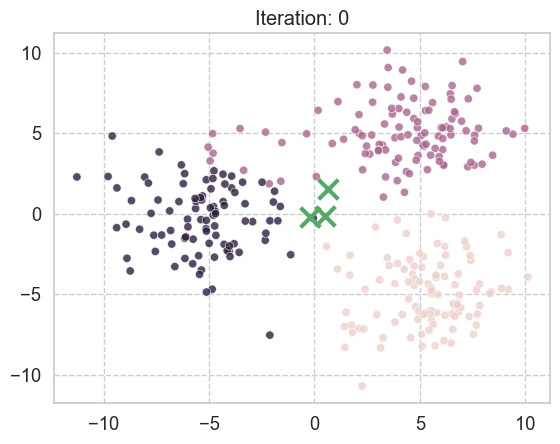

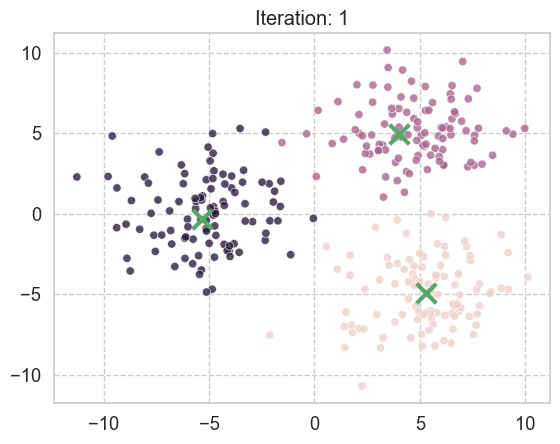

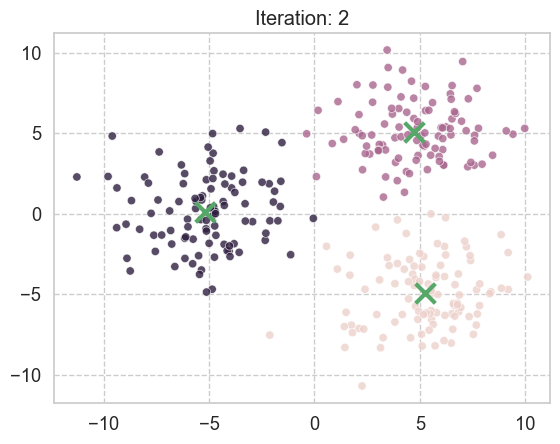

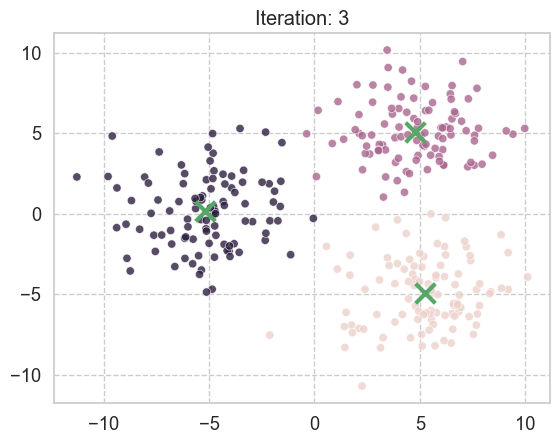

In [4]:
np.random.seed(42)

K = 3  # number of clusters
# inital guess of cluster centers
centers = np.random.normal(size=(K, 2))

centers_history, assignments_history = kmeans(X=X, K=K, initial_centers=centers)
# how to make gif
# convert -background white -alpha remove -layers OptimizePlus -delay 50 *.png kmeans.gif

## K-means with improper choice of K

In the example below, we will show if the choice of K is poor, that is, does not reflect the nature of the underlying data, the K-means will lead to (obvious) bad results.

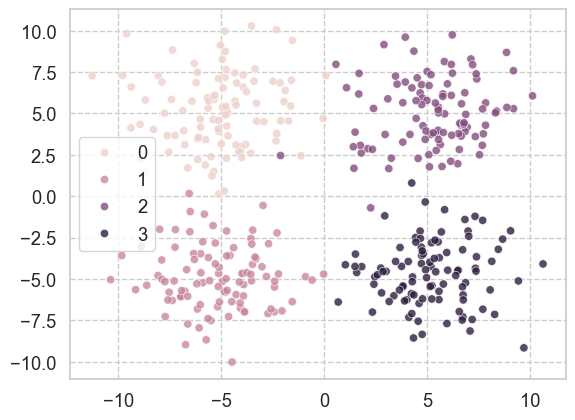

In [5]:
# different example
np.random.seed(42)

X_4_clusters, y_4_clusters = make_blobs(
    n_samples=400, 
    random_state=8, 
    centers=[[-5, 5], [-5, -5], [5, 5], [5, -5]],
    cluster_std=2.0,    
)

plt.figure()
sns.scatterplot(x=X_4_clusters[:, 0], y=X_4_clusters[:, 1], hue=y_4_clusters, alpha=0.8)
plt.show()

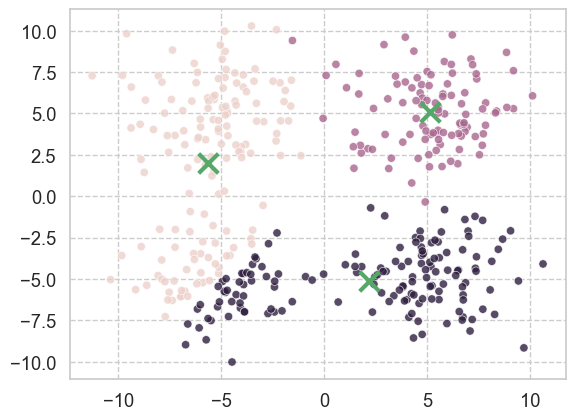

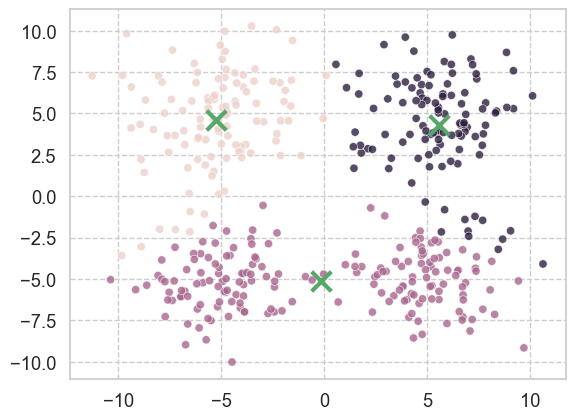

In [6]:
K = 3
centers_history, assignments_history = kmeans(
    X=X_4_clusters, 
    K=K, 
    initial_centers=[[-5, 5], [5, 5], [5, -5]], 
    local_dir=None)
plot_assignment_and_centers(
    X=X_4_clusters, 
    centers=centers_history[-1], 
    assignments=assignments_history[-1])

centers_history, assignments_history = kmeans(
    X=X_4_clusters, 
    K=K, 
    initial_centers=[[-5, 5], [0, -5], [5, 5]], 
    local_dir=None)
plot_assignment_and_centers(
    X=X_4_clusters, 
    centers=centers_history[-1], 
    assignments=assignments_history[-1])

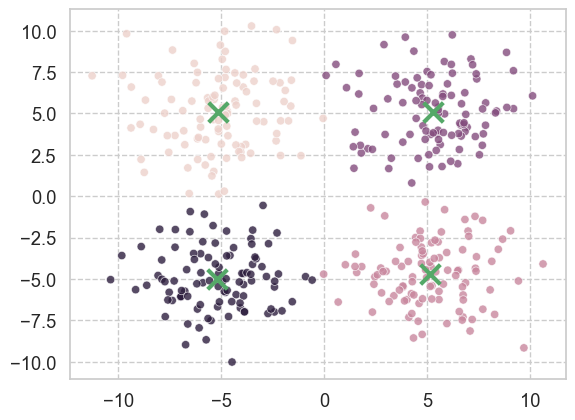

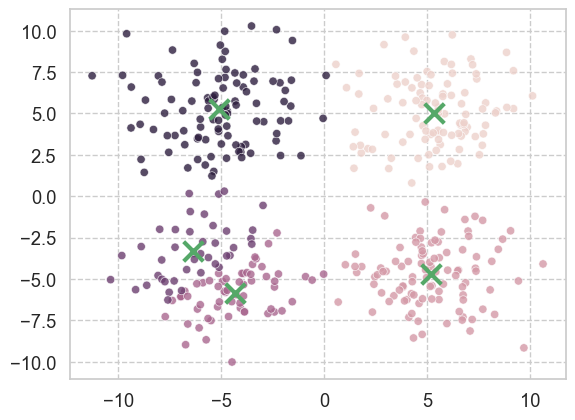

In [7]:
np.random.seed(123)

for K in range(4, 6):
    centers_history, assignments_history = kmeans(
        X=X_4_clusters, 
        K=K, 
        initial_centers=np.random.normal(size=(K, 2)), 
        local_dir=None)
    plot_assignment_and_centers(
        X=X_4_clusters, 
        centers=centers_history[-1], 
        assignments=assignments_history[-1])